<!-- ![](https://cdn.eleflow.com.br/ef-web/wp-content/uploads/2016/08/21181642/Eleflow.png) -->
<img src="../img/logo.png">

# Introdução

Etapa 1 do processo seletivo da Eleflow

<a id="preparacao"></a>
# 1. Preparação do Ambiente

<a id="bibliotecas"></a>
## 1.1. Bibliotecas

In [39]:
# Principais bibliotecas
import numpy as np
import pandas as pd

# Visualização de dados
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import rcParams
from pyecharts.charts import EffectScatter, Bar
from pyecharts.globals import SymbolType
from pyecharts import options as opts

# Outros
import warnings

<a id="configuracoes"></a>
## 1.2. Configurações

In [40]:
# Esconder os warnings
warnings.filterwarnings("ignore")

# Mostrar linhas, colunas e textos completos
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', False)

<a id="carregarDados"></a>
## 1.3. Carregar Dados e Rápida Análise

In [41]:
df = pd.read_csv(r"../data/dataset_video_games.csv")
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# 2. Q1 - Visualização de Dados

Em 2017 a indústria de games faturou mais que a indústria de música e a indústria de filmes (mídia física) juntos! É um fato que esse nicho do entretenimento conquista cada vez mais pessoas ano após ano. No Brasil mais de 66% disseram que consomem entretenimento do nicho de games. 

Anexa você irá encontrar uma base de dados sobre o ranking de vídeo games nos últimos anos e com esse dataset você deverá apresentar as seguintes visualizações:
* a. Histogramas de quantos jogos cada gênero possui nos primeiros 150 títulos do rank
* b. Um gráfico de dispersão entre o ano da publicação e o total de vendas da Nintendo nos últimos 10 anos
* c. As 5 maiores “publishers” em vendas nos Estados Unidos

**Obs: Os valores de venda estão em milhões de dólares**

## 2.1. Histogramas de quantos jogos cada gênero possui nos primeiros 150 títulos do rank  

In [43]:
# Filtro para buscar apenas o ranking dos primeiros 150 títulos
df_histogram = df[df["Rank"] <= 150]
df_histogram.shape

(150, 11)

In [44]:
# Agrupamento por gênero e ranking 
df_genre = df_histogram.groupby(by=["Genre"]).count()[["Rank"]].sort_values(by="Rank", ascending=False)
df_genre

,Rank
Genre,
Shooter,31
Action,24
Role-Playing,23
Platform,22
Racing,14
Misc,12
Sports,11
Fighting,5
Simulation,4


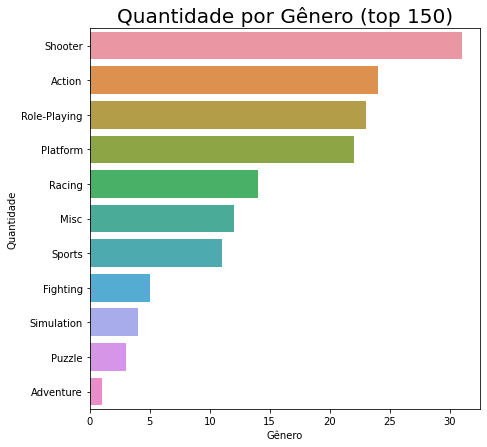

In [45]:
plt.figure(figsize = (7, 7))
sns.barplot(data=df_genre, x="Rank", y=df_genre.index, ci=None)
plt.title("Quantidade por Gênero (top 150)", fontsize=20)
plt.ylabel("Quantidade")
plt.xlabel("Gênero")
plt.show()

## 2.2. Um gráfico de dispersão entre o ano da publicação e o total de vendas da Nintendo nos últimos 10 anos

In [46]:
# Filtro do dataframe por ano e "publisher"
c1 = df["Publisher"] == "Nintendo"
c2 = df["Year"] > 2010

df_scatter = df[c1 & c2]
df_scatter = df_scatter.groupby(by=["Year"]).sum()[["Global_Sales"]]

In [47]:
# Conversão do tipo das variáveis
year = df_scatter.index.astype("int").astype("str").tolist()
sales = df_scatter["Global_Sales"].values.astype("int").tolist()

In [48]:
c = (
 EffectScatter(opts.InitOpts(width = "900px",height = "500px"))
 .add_xaxis(year)
 .add_yaxis("", sales, symbol_size = 20, symbol=SymbolType.DIAMOND, color="#313695")
 .set_global_opts(title_opts=opts.TitleOpts(title="Vendas Totais da Nintendo nos Últimos 10 anos ($ MM)"))
)

c.render_notebook()

## 2.3. As 5 maiores “publishers” em vendas nos Estados Unidos

In [49]:
# Agrupamento por "publisher" e região NA, buscando apenas os cinco primeiros
df_na = df.groupby(by=["Publisher"]).sum()[["NA_Sales"]].sort_values(by="NA_Sales", ascending=False).head(5)

In [50]:
# Renomeia algumas labels para melhor visualização
publisher = df_na.index.tolist()
publisher[1] = "EA"
publisher[3] = "Sony"
sales = df_na["NA_Sales"].values.astype("int").tolist()

In [51]:
c = (
Bar()
.add_xaxis(publisher)
.add_yaxis("",sales, color="#313695")
.set_global_opts(title_opts=opts.TitleOpts(title='5 Maiores "publishers" em vendas nos EUA ($ MM)'))
)

c.render_notebook()

# 3. Q2 - Machine Learning

* a) Qual a diferença entre um aprendizado de máquina supervisionado e um não supervisionado? Dê exemplos de algorítimos para cada um.
* b) Após a execução de dois algorítimos diferentes de machine learning foram resultadas as seguintes matrizes de confusão

<p style="text-align: center;">Matriz Modelo 1</p>
<img src="../img/matrix-1.png">
<br>
<p style="text-align: center;">Matriz Modelo 2</p>
<img src="../img/matrix-2.png">

Analisando
apenas essas matrizes qual modelo você considera o melhor para ser utilizado? Justifique sua resposta

## 3.1. Aprendizado Supervisionado vs. Não Supervisionado

**Supervisionado**

No aprendizado supervisionado utilizamos técnicas de machine learning para tentar prever uma variável resposta a partir de dados históricos. Dessa forma, o modelo aprende quais devem ser os outputs baseando-se no comportamento das variáveis. O principal objetivo desse método é gerar uma função que pode ser usada para novos exemplos. Em um cenário ideal, o algorítmo determinará corretamente os rótulos de classe para casos ainda não vistos. 

Alguns exemplos de algorítmo são: Regressão Linear, Regressão Logística, K-Nearest Neighbour (KNN), Decision Tree e Random Forest.

**Não Supervisionado**

No aprendizado não supervisionado, os dados são não rotulados, ou seja, apenas dados de entrada serão fornecidos. Isso permite ao algorítmo agir sobre as variáveis sem uma orientação definida. Nesse método, o principal objetivo é agrupar os dados de acordo com uma semelhanças entre eles.

Alguns exemplos de algorítmo: Principal Component Analysis (PCA), k-Means Clustering e Hierarchical Clustering.

**Resumindo...**

Enquanto o método supervisionado busca responder uma pergunta (se a bolinha é vermelha ou azul), o método não supervisionado busca apenas agrupar as bolinhas de acordo com suas similaridades.

<img width="700" height="700" src="../img/supervised_unsupervised.png">

## 3.2. Melhor modelo para ser utilizado

In [52]:
def calculate_metrics(matrix):
    
    # Captura os valores da matrix de confusão
    tp = matrix[0][0] 
    fp = matrix[0][1] 
    fn = matrix[1][0] 
    tn = matrix[1][1] 
    
    # Calcula as métricas
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1_score = 2 / ((1/recall) + (1/precision))
    
    # Imprime os valores
    s = (f"Accuracy: {accuracy:0.4f} \n"
         f"Recall: {recall:0.4f} \n"
         f"Precision: {precision:0.4f} \n"
         f"F1-Score: {f1_score:0.4f}")
    print(s)

In [53]:
matrix_m1 = [[5740, 519],[1119, 9413]]
matrix_m2 = [[6751, 705],[2005, 7330]]

In [54]:
print("MODELO 1")
calculate_metrics(matrix_m1)

print("---------------------")

print("MODELO 2")
calculate_metrics(matrix_m2)

MODELO 1
Accuracy: 0.9024 
Recall: 0.8369 
Precision: 0.9171 
F1-Score: 0.8751
---------------------
MODELO 2
Accuracy: 0.8386 
Recall: 0.7710 
Precision: 0.9054 
F1-Score: 0.8328


De acordo com os resultados acima, o modelo 1, sem dúvidas, deve ser escolhido. As principais métricas que podemos retirar de uma matriz de confusão são acurácia, recall, precision e f1-score. A métrica a ser escolhida depende do nosso problema. Nos casos em que a base é desbalanceada, por exemplo, a acurácia não é uma boa métrica e, portanto, alguma das outras três pode ser utilizada. 

Para esse problema, no entanto, os valores de todas as métricas são superiores no primeiro modelo.